- It leverages pre-trained models (often on large datasets) to reduce the need for extensive data and training time on new tasks.

- With pre-trained models, less data is needed to achieve high performance on the target task.

- Transfer learning has revolutionized NLP by enabling models to understand context, perform nuanced tasks, and generate human-like responses.


- In business Context:
  - Customer Support
  - sales and marketing
  - product information
  - FAQ

In [1]:
# Step 1: Install Dependencies
!pip install torch transformers gradio datasets

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths to save files in Google Drive
google_drive_folder = "/content/drive/MyDrive/Colab Notebooks/nlp_pro_babu/models/transderLearning"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Foun

In [2]:
# Import the os module to handle file and folder operations
import os

# Check if the specified folder path (google_drive_folder) exists
# If it doesn't exist, create the folder
if not os.path.exists(google_drive_folder):
    os.makedirs(google_drive_folder)  # Creates the folder with the given path

# Define the full path where the fine-tuned model will be saved within the folder
fine_tuned_model_path = os.path.join(google_drive_folder, "fine_tuned_dialoGPT")



In [3]:
# Import Libraries
import torch  # PyTorch for tensor computations and model handling
from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import gradio as gr  # Gradio for creating user interfaces for the chatbot
from datasets import load_dataset  # Hugging Face Datasets library for dataset loading and processing

# Load the pre-trained DialoGPT model and tokenizer
# Using the "small" version of DialoGPT for faster training and less resource usage
model_name = "microsoft/DialoGPT-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)  # Load the tokenizer associated with the model
model = AutoModelForCausalLM.from_pretrained(model_name)  # Load the model for causal language modeling

# Set padding token to eos_token to handle padding in sequences without generating errors
tokenizer.pad_token = tokenizer.eos_token

# Check if a GPU is available for faster processing and model training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set to GPU if available; otherwise, use CPU
model.to(device)  # Move the model to the selected device (GPU or CPU) for processing


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [4]:
import sqlite3
from transformers import DataCollatorForLanguageModeling, AutoTokenizer
from datasets import Dataset
import pandas as pd

# Create and Connect to SQLite Database for Product Information
db_path = os.path.join(google_drive_folder, "product_info.db")
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Define Product Information Schema and Populate Data
# Create a table to store product information (for example, on Wi-Fi and internet-related products)
cursor.execute('''
CREATE TABLE IF NOT EXISTS product_info (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_name TEXT,
    description TEXT,
    category TEXT
)
''')
conn.commit()

#sample data
sample_data = [
    ("High-Speed Router", "A router providing fast internet speeds for large households.", "Wi-Fi"),
    ("Fiber Optic Modem", "A modem compatible with fiber optic internet connections.", "Internet"),
    ("Wi-Fi Extender", "Device to extend Wi-Fi signal across wider areas.", "Wi-Fi"),
    ("Mesh Wi-Fi System", "A whole-home Wi-Fi system to eliminate dead zones.", "Wi-Fi"),
    ("USB Wi-Fi Adapter", "Plug-in device to add Wi-Fi capability to computers.", "Wi-Fi"),
    ("Ethernet Switch", "Network switch for multiple wired connections.", "Networking"),
    ("Powerline Adapter", "Transmit internet through home electrical wiring.", "Networking"),
    ("Smart Wi-Fi Plug", "Control appliances remotely using Wi-Fi.", "Smart Home"),
    ("Gigabit Router", "High-speed router for Gigabit internet plans.", "Wi-Fi"),
    ("DSL Modem", "Modem designed for DSL internet connections.", "Internet"),
    ("5G Wi-Fi Router", "Router supporting 5G for faster speeds.", "Wi-Fi"),
    ("Mobile Hotspot", "Portable device providing mobile internet.", "Internet"),
    ("Outdoor Wi-Fi Antenna", "Antenna for extending Wi-Fi outdoors.", "Wi-Fi"),
    ("Wi-Fi Range Booster", "Boosts existing Wi-Fi signals.", "Wi-Fi"),
    ("Tri-Band Router", "Router with three bands for reduced congestion.", "Wi-Fi"),
    ("Wi-Fi 6 Router", "Router with Wi-Fi 6 technology for faster speeds.", "Wi-Fi"),
    ("Ethernet Over Coax Adapter", "Extend network using coaxial cables.", "Networking"),
    ("Smart Thermostat", "Wi-Fi-enabled thermostat for home climate control.", "Smart Home"),
    ("Cable Modem", "Modem for cable internet service.", "Internet"),
    ("Network Firewall", "Hardware for network security and filtering.", "Networking"),
    ("Dual-Band Router", "Router with two frequency bands for better connectivity.", "Wi-Fi"),
    ("Bluetooth Adapter", "Device to add Bluetooth capability to computers.", "Networking"),
    ("Network Attached Storage", "Device for centralized storage accessible over Wi-Fi.", "Networking"),
    ("Wi-Fi Doorbell", "Doorbell with video and Wi-Fi connectivity.", "Smart Home"),
    ("Smart Security Camera", "Wi-Fi-enabled security camera for home monitoring.", "Smart Home"),
    ("Smart Lock", "Wi-Fi-enabled lock for remote access control.", "Smart Home"),
    ("Wi-Fi Digital Frame", "Digital photo frame with Wi-Fi connectivity.", "Smart Home"),
    ("4G LTE Modem", "Modem that provides 4G LTE internet access.", "Internet"),
    ("Wi-Fi Printer", "Wireless printer accessible over Wi-Fi.", "Office Equipment"),
    ("Wi-Fi LED Light Strip", "LED strip lights controlled via Wi-Fi.", "Smart Home"),
    ("Wireless Keyboard", "Keyboard with wireless connectivity.", "Accessories"),
    ("Wi-Fi Smoke Detector", "Smoke detector with Wi-Fi alerts.", "Smart Home"),
    ("Wi-Fi Projector", "Projector with Wi-Fi for wireless streaming.", "Office Equipment"),
    ("Smart TV", "Television with Wi-Fi for streaming and apps.", "Entertainment"),
    ("Internet Booster", "Device to improve internet speed and reliability.", "Internet"),
    ("Smart Vacuum Cleaner", "Wi-Fi-enabled vacuum for automated cleaning.", "Smart Home"),
    ("Wi-Fi Scale", "Smart scale that connects to health apps.", "Smart Home"),
    ("Smart Light Bulb", "Light bulb with remote Wi-Fi control.", "Smart Home"),
    ("Wi-Fi Enabled Air Purifier", "Air purifier controllable via Wi-Fi.", "Smart Home"),
    ("Voice Assistant Device", "Wi-Fi-enabled voice assistant.", "Smart Home"),
    ("Gaming Router", "Router optimized for low-latency gaming.", "Wi-Fi"),
    ("Wi-Fi Smart Speaker", "Speaker with Wi-Fi and smart assistant capabilities.", "Entertainment"),
    ("Wireless Charging Pad", "Wi-Fi-enabled pad for wirelessly charging devices.", "Accessories"),
    ("Security Alarm System", "Wi-Fi-enabled home security system.", "Smart Home"),
    ("Wi-Fi Pet Feeder", "Automatic pet feeder with Wi-Fi control.", "Smart Home"),
    ("Remote Control Hub", "Hub to control smart devices via Wi-Fi.", "Smart Home"),
    ("Wi-Fi Smart Plug Strip", "Power strip with multiple smart outlets.", "Smart Home"),
    ("Baby Monitor", "Wi-Fi-enabled monitor for baby monitoring.", "Smart Home"),
    ("Solar-Powered Security Camera", "Outdoor security camera powered by solar energy.", "Smart Home"),
    ("Video Conference System", "Wi-Fi system for remote video conferencing.", "Office Equipment"),
    ("Wi-Fi Smart Thermometer", "Thermometer with app connectivity for tracking.", "Health & Wellness"),
    ("Smart Light Switch", "A Wi-Fi-enabled switch for controlling lights remotely.", "Smart Home"),
    ("Wi-Fi Humidifier", "Smart humidifier that connects to Wi-Fi for remote control.", "Smart Home"),
    ("Wireless Door Sensor", "Sensor that alerts you when a door is opened or closed via Wi-Fi.", "Smart Home"),
    ("Smart Plug Mini", "Compact Wi-Fi-enabled plug for remote control of appliances.", "Smart Home"),
    ("Smart Coffee Maker", "Wi-Fi-connected coffee maker for scheduling brews remotely.", "Smart Home"),
    ("Wi-Fi Water Leak Sensor", "Sensor that detects water leaks and sends Wi-Fi alerts.", "Smart Home"),
    ("Wi-Fi Connected Garage Door Opener", "Enables remote control of garage doors via Wi-Fi.", "Smart Home"),
    ("Voice-Controlled Smart Fan", "Fan with Wi-Fi and voice control integration.", "Smart Home"),
    ("Dual-Band Wi-Fi Adapter", "Adapter supporting 2.4 GHz and 5 GHz bands for better connectivity.", "Networking"),
    ("4G LTE Router", "Router designed for 4G LTE network connections.", "Internet"),
    ("Smart Window Blinds", "Wi-Fi-enabled blinds that can be controlled remotely.", "Smart Home"),
    ("Wi-Fi Picture Frame", "Digital frame with Wi-Fi connectivity for photo updates.", "Smart Home"),
    ("Wi-Fi Connected Soundbar", "Soundbar that connects to Wi-Fi for streaming audio.", "Entertainment"),
    ("Smart Sprinkler System", "Wi-Fi-enabled sprinkler system for automated lawn care.", "Smart Home"),
    ("Wireless Presenter Remote", "Remote for presentations, connected via Wi-Fi.", "Accessories"),
    ("Wi-Fi Enabled Heater", "Smart heater controllable via Wi-Fi and mobile app.", "Smart Home"),
    ("Wi-Fi Wine Cooler", "Temperature-controlled wine cooler with Wi-Fi connectivity.", "Smart Home"),
    ("Wi-Fi Lawn Mower", "Robotic lawn mower controlled via Wi-Fi.", "Smart Home"),
    ("Home Mesh System", "Whole-home mesh network for consistent Wi-Fi coverage.", "Wi-Fi"),
    ("Bluetooth Mesh Gateway", "Device to extend Bluetooth mesh networks over Wi-Fi.", "Networking"),
    ("Smart Wi-Fi Air Conditioner", "Wi-Fi-enabled AC unit for remote temperature control.", "Smart Home"),
    ("Wi-Fi Smart Camera", "Indoor camera with night vision and Wi-Fi connectivity.", "Smart Home"),
    ("Solar Wi-Fi Repeater", "Repeater powered by solar energy for extending Wi-Fi range outdoors.", "Wi-Fi"),
    ("Wireless HDMI Transmitter", "Transmit HDMI signals wirelessly over Wi-Fi.", "Entertainment"),
    ("Wi-Fi Smart Shower Head", "Shower head with Wi-Fi to monitor water usage.", "Smart Home"),
    ("IoT Gateway Hub", "Gateway for managing multiple IoT devices over Wi-Fi.", "Networking"),
    ("Wi-Fi Smoke & Carbon Monoxide Detector", "Detector with Wi-Fi for alerts to phone.", "Smart Home"),
    ("Wi-Fi Garage Camera", "Camera designed specifically for garage monitoring via Wi-Fi.", "Smart Home"),
    ("Smart Lockbox", "Wi-Fi-enabled lockbox for remote access to keys and items.", "Smart Home"),
    ("Wi-Fi Door Lock", "Remote-controlled door lock with Wi-Fi capabilities.", "Smart Home"),
    ("Pet Surveillance Camera", "Wi-Fi camera designed to monitor pets remotely.", "Smart Home"),
    ("Digital Smart Mirror", "Mirror with Wi-Fi for displaying weather, news, etc.", "Smart Home"),
    ("Wi-Fi Enabled Motion Sensor", "Sensor that sends motion alerts over Wi-Fi.", "Smart Home"),
    ("Wi-Fi Weather Station", "Home weather station that connects to Wi-Fi for data logging.", "Smart Home"),
    ("Smart Vacuum with Mapping", "Wi-Fi-enabled vacuum with mapping functionality.", "Smart Home"),
    ("Wi-Fi Bird Feeder", "Bird feeder with a camera and Wi-Fi to view visiting birds.", "Smart Home"),
    ("Outdoor Wi-Fi Outlet", "Weather-resistant outlet with Wi-Fi for remote control.", "Smart Home"),
    ("Wi-Fi Video Doorbell", "Doorbell with video capabilities and Wi-Fi connection.", "Smart Home"),
    ("Smart Body Analyzer", "Scale that connects via Wi-Fi to track health metrics.", "Health & Wellness"),
    ("Wi-Fi Enabled Desk Lamp", "Lamp with adjustable brightness and Wi-Fi connectivity.", "Smart Home"),
    ("Smart Key Finder", "Wi-Fi-enabled device to locate misplaced keys.", "Accessories"),
    ("Wi-Fi Connected Alarm Clock", "Alarm clock with Wi-Fi for internet radio and alarms.", "Smart Home"),
    ("Wi-Fi Connected Mini Projector", "Portable projector with Wi-Fi for wireless streaming.", "Entertainment"),
    ("Wi-Fi Smart Refrigerator", "Refrigerator with Wi-Fi connectivity for inventory tracking.", "Smart Home"),
    ("Wi-Fi Sous Vide Precision Cooker", "Smart sous vide cooker controlled via Wi-Fi.", "Smart Home"),
    ("Wi-Fi Connected Washer", "Washing machine with Wi-Fi for remote operation.", "Smart Home"),
    ("Wi-Fi Enabled Air Fryer", "Air fryer with Wi-Fi for app-based cooking controls.", "Smart Home"),
    ("Voice-Activated Lamp", "Wi-Fi-enabled lamp that responds to voice commands.", "Smart Home"),
    ("Wi-Fi Pool Monitor", "Device for tracking pool water quality via Wi-Fi.", "Smart Home"),
    ("Wi-Fi Controlled Ceiling Fan", "Fan with remote app control through Wi-Fi.", "Smart Home"),
    ("Wi-Fi Curtain Opener", "Device for opening and closing curtains remotely.", "Smart Home"),
]


cursor.executemany("INSERT INTO product_info (product_name, description, category) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Load Data from the Database into a DataFrame
query = "SELECT product_name || ' - ' || description AS text FROM product_info"
product_data = pd.read_sql(query, conn)

# Close the database connection
conn.close()



In [5]:
# Step 4: Convert DataFrame to Hugging Face Dataset Format
dataset = Dataset.from_pandas(product_data)

# Print the loaded dataset to confirm
print("Loaded Dataset:")
print(dataset)

# Step 5: Tokenize the Dataset
# Initialize the tokenizer (replace 'bert-base-uncased' with your model of choice)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    # Tokenize each line, add special tokens, and apply padding and truncation
    return tokenizer(batch["text"], return_special_tokens_mask=True, truncation=True, padding="max_length", max_length=128)

# Apply tokenization to the dataset
tokenized_dataset = dataset.map(tokenize, batched=True, remove_columns=["text"])

# Print the tokenized dataset to confirm
print("Tokenized Dataset:")
print(tokenized_dataset)

# Define Data Collator for Language Modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,  # Set mlm=True for masked language modeling, if needed
)


Loaded Dataset:
Dataset({
    features: ['text'],
    num_rows: 309
})


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/309 [00:00<?, ? examples/s]

Tokenized Dataset:
Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'special_tokens_mask'],
    num_rows: 309
})


In [6]:
# Define Training Arguments and Fine-Tune the Model
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=1000,
    save_total_limit=1,
    logging_dir='./logs',
    report_to="none",  # Disable Weights and Biases logging
)
from datasets import DatasetDict

# Split the tokenized dataset into train and test sets (80-20 split)
split_datasets = tokenized_dataset.train_test_split(test_size=0.2)
dataset_dict = DatasetDict({"train": split_datasets["train"], "test": split_datasets["test"]})


# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset_dict["train"],  # Now references the train split
    eval_dataset=dataset_dict["test"]     # Optionally include evaluation split
)
# Fine-tune the model
trainer.train()

# Save the fine-tuned model in Google Drive
model.save_pretrained(fine_tuned_model_path)
tokenizer.save_pretrained(fine_tuned_model_path)

# Load the fine-tuned model from Google Drive
model = AutoModelForCausalLM.from_pretrained(fine_tuned_model_path)
tokenizer = AutoTokenizer.from_pretrained(fine_tuned_model_path)
model.to(device)



Step,Training Loss


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [7]:
# Step 7: Define a Function for Generating Chatbot Responses
def generate_response(history, user_input):
    if history is None:
        history = ""

    # Append the user input to the conversation history
    history += f"User: {user_input}\n"

    # Encode the conversation history and user input for the model
    try:
        input_ids = tokenizer.encode(history + tokenizer.eos_token, return_tensors="pt").to(device)

        # Generate a response from the model
        with torch.no_grad():
            output_ids = model.generate(
                input_ids,
                max_length=1000,
                pad_token_id=tokenizer.eos_token_id,
                do_sample=True,
                top_p=0.92,
                temperature=0.75,
                top_k=50
            )

        # Decode the output and get the chatbot's response
        bot_response = tokenizer.decode(output_ids[:, input_ids.shape[-1]:][0], skip_special_tokens=True)

    except Exception as e:
        bot_response = "An error occurred while generating the response. Please try again."
        print("Model Error:", e)

    # Append the bot response to the conversation history
    history += f"Bot: {bot_response}\n\n"

    # Return the updated history and clear the user input
    return history, ""



In [8]:
# Step 8: Create the Gradio Interface with State for Persistent History
interface = gr.Interface(
    fn=generate_response,
    inputs=[
        gr.State(),  # Persistent history state across interactions
        gr.Textbox(placeholder="Type your message here...", label="Your Message")
    ],
    outputs=[
        gr.Textbox(lines=10, label="History"),
        gr.State()  # Retain the conversation history
    ],
    title="Fine-Tuned DialoGPT Chatbot (Technical Support)",
    description="This chatbot has been fine-tuned to respond to technical support queries.",
    examples=[
        ["My Wi-Fi is not working."],
        ["How do I reset my password?"],
        ["I can't access my email."],
        ["How do I connect to a VPN?"]
    ]
)

# Step 9: Launch the Gradio Interface
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be6e55ed5ef6c89aa1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Evaluation
### **1. Saving and Loading Model from Google Drive**

After training the model, it's crucial to save it, especially if you've invested time and resources in training. Here, we demonstrate how to save the trained model in Google Drive and reload it.



In [9]:
### Step 6: Saving and Loading the Model from Google Drive
import os
from google.colab import drive

# Mount Google Drive to save trained models (optional)
drive.mount('/content/drive')

# Define the directory to save and load models
model_save_path = "/content/drive/MyDrive/Colab Notebooks/nlp_pro_babu/models/transderLearning"

# Save the trained model
def save_model(model, tokenizer, path):
    """
    Save the trained model and tokenizer to the specified path.
    Args:
        model: Trained transformer model.
        tokenizer: Corresponding tokenizer.
        path (str): Path to save the model.
    """
    if not os.path.exists(path):
        os.makedirs(path)
    model.save_pretrained(path)
    tokenizer.save_pretrained(path)
    print(f"Model and tokenizer saved to {path}.")

save_model(model, tokenizer, model_save_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model and tokenizer saved to /content/drive/MyDrive/Colab Notebooks/nlp_pro_babu/models/transderLearning.


In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM  # Import the appropriate classes from transformers
from google.colab import drive

# Define the directory to save and load models
model_save_path = "/content/drive/MyDrive/Colab Notebooks/nlp_pro_babu/models/transderLearning"

# Load the saved model and tokenizer
def load_model(path):
    """
    Load the saved model and tokenizer from the specified path.
    Args:
        path (str): Path where the model is saved.
    Returns:
        model: Loaded transformer model.
        tokenizer: Loaded tokenizer.
    """
    # Load the tokenizer from the specified path
    tokenizer = AutoTokenizer.from_pretrained(path)

    # Load the trained model from the specified path
    model = AutoModelForCausalLM.from_pretrained(path)  # Automatically detects `.safetensors` if present
    model.to(device)  # Move model to the specified device (GPU or CPU)

    print("Model and tokenizer loaded successfully from Google Drive.")
    return model, tokenizer

# Call the load_model function to load the model and tokenizer
model, tokenizer = load_model(model_save_path)


Model and tokenizer loaded successfully from Google Drive.


### **2. Model Evaluation with Predefined Set of Inputs**

To evaluate the chatbot, we use a set of predefined test inputs and generate responses.



In [12]:
# Define test inputs for evaluation to check chatbot responses
predefined_inputs = [
    "Suggest a router for a large home",
    "What is mesh Wi-Fi?",
    "Do I need a Wi-Fi extender?",
    "How to boost my internet speed?",
    "Can I control appliances with Wi-Fi?",
    "What does a smart plug do?",
    "Can I monitor my home remotely?",
    "Tell me about fiber modems",
    "Do you have Wi-Fi cameras?",
    "How to set up a smart home?"
]

# Set the model to evaluation mode
model.eval()
generated_responses = []  # List to store generated responses for each input

# Ensure pad_token_id is set to eos_token_id to prevent padding issues
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

for input_text in predefined_inputs:
    # Tokenize the input text and add attention masks for processing
    inputs = tokenizer(input_text, return_tensors='pt', padding=True, truncation=True).to(device)
    input_ids = inputs.input_ids  # Tokenized input IDs
    attention_mask = inputs.attention_mask  # Attention mask to handle padding

    # Generate response using the model with settings for open-ended generation
    output_ids = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=50,  # Limit the maximum length of the response
        num_beams=5,  # Use beam search for higher quality responses
        early_stopping=True,  # Stop generation when end-of-sequence token is produced
        pad_token_id=tokenizer.pad_token_id  # Set pad_token_id to handle padding correctly
    )

    # Decode the generated tokens back into human-readable text
    response = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    generated_responses.append(response)  # Add the response to the list

# Display input and generated response pairs for evaluation
for i, (input_text, response) in enumerate(zip(predefined_inputs, generated_responses)):
    print(f"Input {i+1}: {input_text}")
    print(f"Response {i+1}: {response}")
    print('-' * 50)  # Divider line for readability


Input 1: Suggest a router for a large home
Response 1: suggest a router for a large home wi - fi fi fi fi fi wi fi fi wi fi fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi
--------------------------------------------------
Input 2: What is mesh Wi-Fi?
Response 2: what is mesh wi - fi? fi remote remote remote remote remote remote remote wi remote remote remote remote remote remote wi remote remote remote remote remote wi remote remote remote remote remote remote wi remote remote remote remote wi remote remote remote remote remote remote remote
--------------------------------------------------
Input 3: Do I need a Wi-Fi extender?
Response 3: do i need a wi - fi extender? wi - fi fi fi fi fi fi fi wi fi fi wi - fi wi fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi
--------------------------------------------------
Input 4: How to boost my internet speed?
Response 4: how to boost my internet speed? wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi

### **3. Evaluation Metrics - BLEU and Cosine Similarity**

After generating responses, we use evaluation metrics like **BLEU score** and **Cosine Similarity** to measure the quality of responses.

#### **3.1 BLEU Score Calculation**



/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

BLEU Score for Response 1: 0.0000
BLEU Score for Response 2: 0.0000
BLEU Score for Response 3: 0.0000
BLEU Score for Response 4: 0.0000
BLEU Score for Response 5: 0.0000
BLEU Score for Response 6: 0.0000
BLEU Score for Response 7: 0.0000
BLEU Score for Response 8: 0.0000
BLEU Score for Response 9: 0.0000
BLEU Score for Response 10: 0.0487


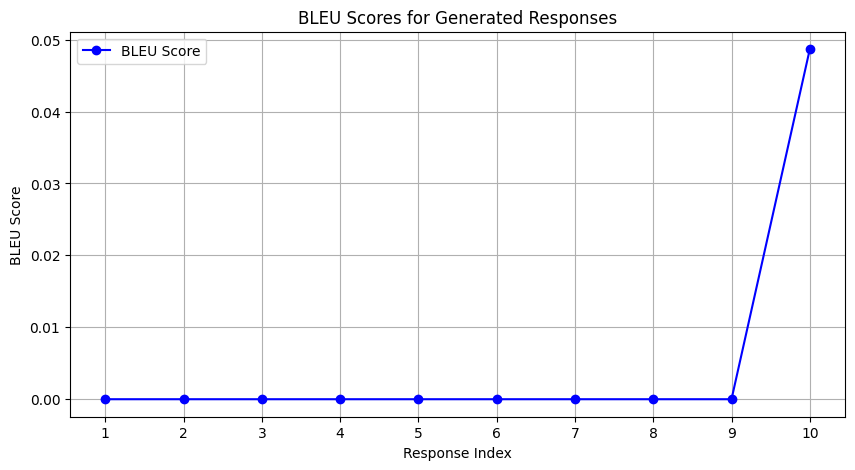

In [13]:

from nltk.translate.bleu_score import sentence_bleu

# Define the reference responses to be used for evaluation
generated_responses = [
    "suggest a router for a large home wi - fi fi fi fi fi wi fi fi wi fi fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi",
    "what is mesh wi - fi? fi remote remote remote remote remote remote remote wi remote remote remote remote remote remote wi remote remote remote remote remote wi remote remote remote remote remote remote wi remote remote remote remote wi remote remote remote remote remote remote remote",
    "do i need a wi - fi extender? wi - fi fi fi fi fi fi fi wi fi fi wi - fi wi fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi",
    "how to boost my internet speed? wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi",
    "can i control appliances with wi - fi? fi remote remote remote remote remote remote remote wi remote remote remote remote remote wi remote remote remote remote remote remote wi remote remote remote remote wi remote remote remote remote remote wi remote remote remote remote remote remote",
    "what does a smart plug do? smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart smart",
    "can i monitor my home remotely? remote remote remote remote remote remote remote remote remote remote remote wi remote remote remote remote remote remote remote remote wi remote remote remote remote remote remote wi remote remote remote remote remote remote wi remote remote remote remote remote remote",
    "tell me about fiber modems wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi wi",
    "do you have wi - fi cameras? fi fi fi fi fi wi - fi fi fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi wi - fi",
    "how to set up a smart home? route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route route"
]



# Define the reference responses to be used for evaluation
reference_responses = [
    "For large homes, a high-speed or mesh Wi-Fi router can help cover all areas efficiently.",
    "Mesh Wi-Fi is a system that uses multiple devices to distribute Wi-Fi signal evenly across your home.",
    "A Wi-Fi extender can be useful if there are dead zones in your home where the Wi-Fi signal is weak.",
    "To boost internet speed, you could try upgrading to a high-speed router, checking for obstructions, or using a mesh network.",
    "Yes, with smart plugs or switches connected to Wi-Fi, you can control appliances remotely through an app.",
    "A smart plug allows you to control connected appliances remotely, set schedules, and monitor energy usage.",
    "Yes, Wi-Fi-enabled security cameras or home monitoring systems allow you to monitor your home remotely.",
    "Fiber modems are compatible with fiber optic internet services and are ideal for high-speed data transmission.",
    "Yes, there are Wi-Fi cameras designed for security purposes that allow remote monitoring through an app.",
    "To set up a smart home, start with Wi-Fi-enabled devices like smart lights, locks, thermostats, and cameras."
]


# Calculate BLEU scores for generated responses
bleu_scores = []
for i in range(len(predefined_inputs)):
    reference = [reference_responses[i].split()]
    candidate = generated_responses[i].split()
    bleu_score = sentence_bleu(reference, candidate)
    bleu_scores.append(bleu_score)

# Display BLEU scores
for i, score in enumerate(bleu_scores):
    print(f"BLEU Score for Response {i+1}: {score:.4f}")

import matplotlib.pyplot as plt

# Plot BLEU Scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(bleu_scores) + 1), bleu_scores, marker='o', linestyle='-', color='b', label='BLEU Score')
plt.xlabel("Response Index")
plt.ylabel("BLEU Score")
plt.title("BLEU Scores for Generated Responses")
plt.xticks(range(1, len(bleu_scores) + 1))
plt.legend()
plt.grid()
plt.show()


#### **3.2 Cosine Similarity Calculation**



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Cosine Similarity for Response 1: 0.6726
Cosine Similarity for Response 2: 0.4698
Cosine Similarity for Response 3: 0.6703
Cosine Similarity for Response 4: 0.3860
Cosine Similarity for Response 5: 0.5211
Cosine Similarity for Response 6: 0.4555
Cosine Similarity for Response 7: 0.4752
Cosine Similarity for Response 8: 0.3568
Cosine Similarity for Response 9: 0.5898
Cosine Similarity for Response 10: 0.4084


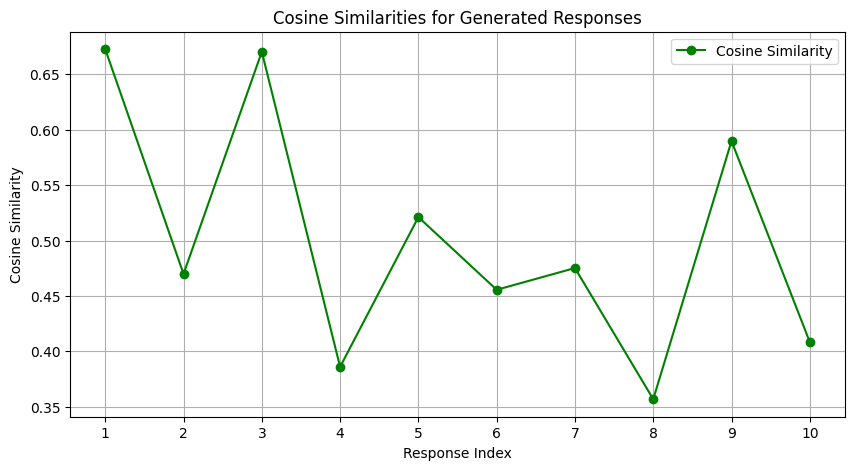

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT for embedding generation
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)

# Function to generate embeddings
def get_embeddings(text):
    input_ids = bert_tokenizer(text, return_tensors='pt').input_ids.to(device)
    with torch.no_grad():
        embeddings = bert_model(input_ids).last_hidden_state.mean(dim=1)  # Mean pooling
    return embeddings

# Calculate Cosine Similarity for each generated response and reference response
cosine_similarities = []
for i in range(len(predefined_inputs)):
    reference_embedding = get_embeddings(reference_responses[i])
    generated_embedding = get_embeddings(generated_responses[i])
    similarity = cosine_similarity(reference_embedding.cpu().numpy(), generated_embedding.cpu().numpy())[0][0]
    cosine_similarities.append(similarity)

# Display Cosine Similarity scores
for i, score in enumerate(cosine_similarities):
    print(f"Cosine Similarity for Response {i+1}: {score:.4f}")


# Plot Cosine Similarity Scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cosine_similarities) + 1), cosine_similarities, marker='o', linestyle='-', color='g', label='Cosine Similarity')
plt.xlabel("Response Index")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarities for Generated Responses")
plt.xticks(range(1, len(cosine_similarities) + 1))
plt.legend()
plt.grid()
plt.show()

